# Fake news prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import string

In [36]:
data=pd.read_csv("C:/Users/Princia/Downloads/datasets/news.csv")
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [39]:
data['label'].replace(['FAKE','REAL'],[0,1],inplace=True)

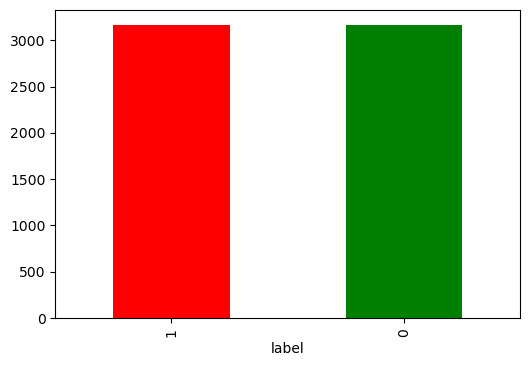

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
data.label.value_counts().plot.bar(color=['red','green'])
plt.show()

In [4]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [5]:
data_news=data.drop(['Unnamed: 0','title'],axis=1,inplace=False)
data_news.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [6]:
data_news.shape

(6335, 2)

In [7]:
data_news.label.value_counts()

label
1    3171
0    3164
Name: count, dtype: int64

In [8]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[."?\]', "", text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), "", text)
    text = re.sub(r'\n', "", text)
    text = re.sub(r"\w\d\w", "", text)
    return text


In [9]:
data_news['text']=data_news['text'].apply(wordopt)

In [10]:
data_news.head()

,text,label
0,daniel greenfield a shillman journalism fello...,0
1,google pinterest digg linkedin reddit stumbleu...,0
2,u s secretary of state john f kerry said mon...,1
3,kaydee king kaydeeking november 9 6 the ...,0
4,it s primary day in new york and front runners...,1


In [11]:
data_testing=data_news.tail(5)
data_news=data_news.drop(range(6330,6335))

In [12]:
data_news.tail(5)

,text,label
6325,written by peter van buren venerable new yor...,0
6326,doj complaint comey under fire over partisan ...,0
6327,the freshman senator from georgia quoted scrip...,1
6328,,0
6329,julian assange has claimed the hillary clinton...,0


In [13]:
x=data_news['text']
y=data_news['label']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score, classification_report
LRpred=LR.predict(xv_test)
accuracy_score(y_test,LRpred)

0.9210110584518167

In [18]:
print(classification_report(y_test,LRpred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       643
           1       0.93      0.91      0.92       623

    accuracy                           0.92      1266
   macro avg       0.92      0.92      0.92      1266
weighted avg       0.92      0.92      0.92      1266



In [19]:
def output_label(n):
    if n==0:
        return 'Fake news'
    elif n==1:
        return 'Not a fake news'

In [20]:
def manual_testing(news):
    text={'text':[news]}
    news_df=pd.DataFrame(text)
    news_df['text']=news_df['text'].apply(wordopt)
    new_news_df=news_df['text']
    xv_news=vectorization.transform(new_news_df)
    pred=LR.predict(xv_news)
    return f'Predicted news is {output_label(pred)}'

In [21]:
data=data_testing.sample(1)

In [22]:
data

,text,label
6330,the state department told the republican natio...,1


In [23]:
text_string = data['text'].to_string(index=False)
text_string

'the state department told the republican nation...'

In [24]:
manual_testing(text_string)

'Predicted news is Not a fake news'